In [1]:
from bs4 import BeautifulSoup
import numpy as np # library to handle data in a vectorized manner

In [2]:
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
import json # library to handle JSON files

In [4]:
# !conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

In [5]:
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

In [6]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

In [7]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

In [9]:
! pip install folium # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

     |████████████████████████████████| 92kB 20.6MB/s eta 0:00:01


In [10]:
print('Libraries imported.')

Libraries imported.


In [11]:
# import the library we use to open URLs
import urllib.request

In [12]:
# specify which URL/web page we are going to be scraping
url = "https://en.wikipedia.org/wiki/Municipalities_of_Milan"

In [13]:
# open the url using urllib.request and put the HTML into the page variable
page = urllib.request.urlopen(url)

In [14]:
# parse the HTML from our URL into the BeautifulSoup parse tree format
soup = BeautifulSoup(page, 'lxml')

In [15]:
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Municipalities of Milan - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"XqXrTQpAAEEAAIHE5zEAAAAI","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Municipalities_of_Milan","wgTitle":"Municipalities of Milan","wgCurRevisionId":937714938,"wgRevisionId":937714938,"wgArticleId":29822831,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with Italian-language sources (it)","Webarchive template wayback links","Articles containing Italian-language text","Common

In [16]:
all_tables=soup.find_all("table")
all_tables

[<table class="wikitable sortable centre">
 <tbody><tr>
 <th>Zone
 </th>
 <th>President
 </th>
 <th colspan="2">Party
 </th>
 <th>Votes
 </th>
 <th>%
 </th>
 <th colspan="2">Mayoral majority
 </th></tr>
 <tr>
 <td>1
 </td>
 <td>Fabio Luigi Arrigoni
 </td>
 <td bgcolor="red"></td>
 <td><a href="/wiki/Democratic_Party_(Italy)" title="Democratic Party (Italy)">PD</a>
 </td>
 <td>18,081
 </td>
 <td><b>45.2</b>
 </td>
 <td><img alt="☑" data-file-height="600" data-file-width="600" decoding="async" height="20" src="//upload.wikimedia.org/wikipedia/en/thumb/f/fb/Yes_check.svg/20px-Yes_check.svg.png" srcset="//upload.wikimedia.org/wikipedia/en/thumb/f/fb/Yes_check.svg/30px-Yes_check.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/f/fb/Yes_check.svg/40px-Yes_check.svg.png 2x" width="20"/><span style="display:none">Y</span>
 </td></tr>
 <tr>
 <td>2
 </td>
 <td>Samuele Piscina
 </td>
 <td bgcolor="green"></td>
 <td><a href="/wiki/Lega_Nord" title="Lega Nord">LN</a>
 </td>
 <td>23,318
 </td

In [17]:
right_table=soup.find('table', class_='wikitable sortable')
right_table

<table class="wikitable sortable">
<tbody><tr>
<th>Borough</th>
<th class="unsortable">Name</th>
<th>Area<br/>(km<sup>2</sup>)</th>
<th>Population<br/>(2014)</th>
<th>Population density<br/>(inhabitants/km<sup>2</sup>)</th>
<th>Quartieri (districts)
</th></tr>
<tr>
<td><i><a href="/wiki/Zone_1_of_Milan" title="Zone 1 of Milan">1</a></i></td>
<td><a class="new" href="/w/index.php?title=Centro_storico_(district_of_Milan)&amp;action=edit&amp;redlink=1" title="Centro storico (district of Milan) (page does not exist)">Centro storico</a></td>
<td>9.67</td>
<td>96,315</td>
<td>11,074</td>
<td><a href="/wiki/Brera_(district_of_Milan)" title="Brera (district of Milan)">Brera</a>, <a class="new" href="/w/index.php?title=Centro_Storico_(district_of_Milan)&amp;action=edit&amp;redlink=1" title="Centro Storico (district of Milan) (page does not exist)">Centro Storico</a>, <a href="/wiki/Conca_del_Naviglio" title="Conca del Naviglio">Conca del Naviglio</a>, <a class="new" href="/w/index.php?title=Gua

In [18]:
A=[]
B=[]
C=[]
D=[]
E=[]
F=[]

for row in right_table.findAll('tr'):
    cells=row.findAll('td')
    if len(cells)==6:
        A.append(cells[0].find(text=True))
        B.append(cells[1].find(text=True))
        C.append(cells[2].find(text=True))
        D.append(cells[3].find(text=True))
        E.append(cells[4].find(text=True))
        F.append(cells[5].find(text=True))

In [19]:
import pandas as pd
df=pd.DataFrame(A,columns=['Borough'])
df['Name']=B
df['Area']=C
df['Population']=D
df['Density']=E
df['District']=F
df

,Borough,Name,Area,Population,Density,District
0,1,Centro storico,9.67,"96,315","11,074",Brera
1,2,Stazione Centrale,12.58,153.109,"13,031",Adriano
2,3,Città Studi,14.23,"141,229","10,785",Casoretto
3,4,Porta Vittoria,20.95,156.369,"8,069",Acquabella
4,5,Vigentino,29.87,"123,779","4,487",Basmetto
5,6,Barona,18.28,"149,000","8,998",Arzaga
6,7,Baggio,31.34,"170,814","6,093",Assiano
7,8,Fiera,23.72,"181,669","8,326",Boldinasco
8,9,Porta Garibaldi,21.12,"181,598","9,204",Affori


In [20]:
df.drop(['District'],axis=1)

,Borough,Name,Area,Population,Density
0,1,Centro storico,9.67,"96,315","11,074"
1,2,Stazione Centrale,12.58,153.109,"13,031"
2,3,Città Studi,14.23,"141,229","10,785"
3,4,Porta Vittoria,20.95,156.369,"8,069"
4,5,Vigentino,29.87,"123,779","4,487"
5,6,Barona,18.28,"149,000","8,998"
6,7,Baggio,31.34,"170,814","6,093"
7,8,Fiera,23.72,"181,669","8,326"
8,9,Porta Garibaldi,21.12,"181,598","9,204"


In [21]:
df['Area'] = pd.to_numeric(df['Area'])
df.dtypes

Borough        object
Name           object
Area          float64
Population     object
Density        object
District       object
dtype: object

In [22]:
df['Population'][1] = df['Population'][1].replace('.','')
df['Population'][3] = df['Population'][3].replace('.','')

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [23]:
df['Population'] = pd.to_numeric(df['Population'].str.replace(',',''))
df.dtypes

Borough        object
Name           object
Area          float64
Population      int64
Density        object
District       object
dtype: object

In [24]:
df['Density'] = pd.to_numeric(df['Density'].str.replace(',',''))
df.dtypes

Borough        object
Name           object
Area          float64
Population      int64
Density         int64
District       object
dtype: object

In [25]:
df

,Borough,Name,Area,Population,Density,District
0,1,Centro storico,9.67,96315,11074,Brera
1,2,Stazione Centrale,12.58,153109,13031,Adriano
2,3,Città Studi,14.23,141229,10785,Casoretto
3,4,Porta Vittoria,20.95,156369,8069,Acquabella
4,5,Vigentino,29.87,123779,4487,Basmetto
5,6,Barona,18.28,149000,8998,Arzaga
6,7,Baggio,31.34,170814,6093,Assiano
7,8,Fiera,23.72,181669,8326,Boldinasco
8,9,Porta Garibaldi,21.12,181598,9204,Affori


In [26]:
!pip install geopy

In [27]:
!pip install pgeocode

In [28]:
import pgeocode

In [29]:
nomi = pgeocode.Nominatim('it')

In [30]:
df_1 = nomi.query_postal_code(["20125", "20127", "20134", "20138", "20142", "20143", "20151", "20157", "20162"])
df_1

,postal_code,country code,place_name,state_name,state_code,county_name,county_code,community_name,community_code,latitude,longitude,accuracy
0,20125,IT,"Greco, Precotto, Milano, Gorla",Lombardia,9,Milano,MI,NaN,NaN,45.5024,9.200175,4
1,20127,IT,"Crescenzago, Milano",Lombardia,9,Milano,MI,NaN,NaN,45.5077,9.218700,4
2,20134,IT,"Lambrate, Milano",Lombardia,9,Milano,MI,NaN,NaN,45.4823,9.215250,4
3,20138,IT,"Rogoredo, Milano",Lombardia,9,Milano,MI,NaN,NaN,45.4313,9.217200,4
4,20142,IT,"Gratosoglio, Milano",Lombardia,9,Milano,MI,NaN,NaN,45.4122,9.180500,4
5,20143,IT,"Barona, Milano",Lombardia,9,Milano,MI,NaN,NaN,45.4371,9.171950,4
6,20151,IT,"Musocco, Milano",Lombardia,9,Milano,MI,NaN,NaN,45.5049,9.158000,4
7,20157,IT,"Quarto Oggiaro, Vialba, Milano",Lombardia,9,Milano,MI,NaN,NaN,45.5168,9.163000,4
8,20162,IT,"Niguarda, Milano",Lombardia,9,Milano,MI,NaN,NaN,45.4643,9.189500,3


In [31]:
df["Latitude"] = df_1["latitude"]
df["Longitude"] = df_1["longitude"]
df

,Borough,Name,Area,Population,Density,District,Latitude,Longitude
0,1,Centro storico,9.67,96315,11074,Brera,45.5024,9.200175
1,2,Stazione Centrale,12.58,153109,13031,Adriano,45.5077,9.218700
2,3,Città Studi,14.23,141229,10785,Casoretto,45.4823,9.215250
3,4,Porta Vittoria,20.95,156369,8069,Acquabella,45.4313,9.217200
4,5,Vigentino,29.87,123779,4487,Basmetto,45.4122,9.180500
5,6,Barona,18.28,149000,8998,Arzaga,45.4371,9.171950
6,7,Baggio,31.34,170814,6093,Assiano,45.5049,9.158000
7,8,Fiera,23.72,181669,8326,Boldinasco,45.5168,9.163000
8,9,Porta Garibaldi,21.12,181598,9204,Affori,45.4643,9.189500


In [32]:
address = 'Milan, IT'

geolocator = Nominatim(user_agent="tor_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Milan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Milan are 45.4668, 9.1905.


In [33]:
# create map of Toronto using latitude and longitude values
map_milan = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df['Latitude'], df['Longitude'], df['Name'], df['District']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_milan)  
    
map_milan

In [34]:
CLIENT_ID = '3GV3ZWDKEHEAGFHO13D3DF3P4NNNY5TQVVINX0VW52GVZRXC' # your Foursquare ID
CLIENT_SECRET = '2UJA2GOE33AUWGHXIBOUSHZWFOAVPDKZBCCO4WR5CMLYLI2V' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 3GV3ZWDKEHEAGFHO13D3DF3P4NNNY5TQVVINX0VW52GVZRXC
CLIENT_SECRET:2UJA2GOE33AUWGHXIBOUSHZWFOAVPDKZBCCO4WR5CMLYLI2V


In [35]:
df.loc[0, 'Name']
neighborhood_latitude = df.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = df.loc[0, 'Name'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Centro storico are 45.5024, 9.200175000000002.


In [36]:
LIMIT = 300 # limit of number of venues returned by Foursquare API
radius = 3000 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=3GV3ZWDKEHEAGFHO13D3DF3P4NNNY5TQVVINX0VW52GVZRXC&client_secret=2UJA2GOE33AUWGHXIBOUSHZWFOAVPDKZBCCO4WR5CMLYLI2V&v=20180605&ll=45.5024,9.200175000000002&radius=3000&limit=300'

In [37]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ea85eafb57e88001bb1b5d2'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Milan',
  'headerFullLocation': 'Milan',
  'headerLocationGranularity': 'city',
  'totalResults': 212,
  'suggestedBounds': {'ne': {'lat': 45.52940002700003,
    'lng': 9.23862614488364},
   'sw': {'lat': 45.47539997299997, 'lng': 9.161723855116364}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '5501cbae498e6dd512b9d4b0',
       'name': 'Palestra McFIT',
       'location': {'address': 'Viale Fulvio Testi 29',
        'lat': 45.5047239,
        'lng': 9.1992649,
        'labeledLatLngs': [{'label': 'display',
          'lat': 45.5047239,
          'lng': 9.1992649}],
 

In [38]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

KeyError: 'venues'

In [39]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [40]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

print(nearby_venues.shape)
nearby_venues.head()

(100, 4)


,name,categories,lat,lng
0,Palestra McFIT,Gym,45.504724,9.199265
1,Pasticceria Martesana,Dessert Shop,45.495824,9.203095
2,Nisida,Pizza Place,45.507636,9.203686
3,BB Hotels Residenza Bicocca,Bed & Breakfast,45.499852,9.198630
4,Il Borghetto,Steakhouse,45.501415,9.209785


In [41]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


In [42]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Name', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [43]:
milan_venues = getNearbyVenues(names=df['Name'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Centro storico
Stazione Centrale
Città Studi
Porta Vittoria
Vigentino
Barona
Baggio
Fiera
Porta Garibaldi


In [45]:
print("Shape of the Venues Dataframe: ", milan_venues.shape)
milan_venues.head(4)

Shape of the Venues Dataframe:  (535, 7)


,Name,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Centro storico,45.5024,9.200175,Palestra McFIT,45.504724,9.199265,Gym
1,Centro storico,45.5024,9.200175,BB Hotels Residenza Bicocca,45.499852,9.198630,Bed & Breakfast
2,Centro storico,45.5024,9.200175,Ristorante Sirenella,45.500322,9.198919,Seafood Restaurant
3,Centro storico,45.5024,9.200175,Nisida,45.507636,9.203686,Pizza Place


In [46]:
map_venues = folium.Map(location=[latitude,longitude],zoom_start=11, tiles="openstreetmap")

Districts = ['Centro storico','Stazione Centrale','Città Studi','Porta Vittoria','Vigentino','Barona','Baggio','Fiera','Porta Garibaldi']

x1 = np.arange(len(Districts))

rainbow = ['#00ff00','#ff00ff','#0000ff','#ffa500','#ff0000','beige','black','blue','cadetblue']

# add markers to the map
# markers_colors = []
for lat, lon, poi, distr in zip(milan_venues['Venue Latitude'],
                               milan_venues['Venue Longitude'],
                               milan_venues['Venue Category'],
                                milan_venues['Name']):
    label = folium.Popup(str(poi) + ' ' + str(distr), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=7,
        popup=label,
        color=rainbow[Districts.index(distr)-1],
        fill=True,
        fill_color=rainbow[Districts.index(distr)-1],
        fill_opacity=0.3).add_to(map_venues)
    
map_venues

In [47]:
milan_restaurants = milan_venues[milan_venues['Venue Category'].str.contains('Restaurant')].reset_index(drop=True)

In [48]:
milan_restaurants.index = np.arange(1,len(milan_restaurants)+1)
print("Shape of the Data Frame with only restaurants: ",milan_restaurants.shape)
milan_restaurants.head(4)

Shape of the Data Frame with only restaurants:  (125, 7)


,Name,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,Centro storico,45.5024,9.200175,Ristorante Sirenella,45.500322,9.198919,Seafood Restaurant
2,Centro storico,45.5024,9.200175,Ristorante Basilio,45.498242,9.208237,Seafood Restaurant
3,Centro storico,45.5024,9.200175,A' Riccione,45.494480,9.195810,Seafood Restaurant
4,Centro storico,45.5024,9.200175,Heguì,45.496738,9.190455,Japanese Restaurant


In [49]:
map_restaurants = folium.Map(location=[latitude,longitude],zoom_start=11, tiles="openstreetmap")

Districts = ['Centro storico','Stazione Centrale','Città Studi','Porta Vittoria','Vigentino','Barona','Baggio','Fiera','Porta Garibaldi']

x1 = np.arange(len(Districts))

rainbow = ['#00ff00','#ff00ff','#0000ff','#ffa500','#ff0000','beige','black','blue','cadetblue']

# add markers to the map
# markers_colors = []
for lat, lon, poi, distr in zip(milan_restaurants['Venue Latitude'],
                               milan_restaurants['Venue Longitude'],
                               milan_restaurants['Venue Category'],
                                milan_restaurants['Name']):
    label = folium.Popup(str(poi) + ' ' + str(distr), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=7,
        popup=label,
        color=rainbow[Districts.index(distr)-1],
        fill=True,
        fill_color=rainbow[Districts.index(distr)-1],
        fill_opacity=0.3).add_to(map_restaurants)
    
map_restaurants

In [50]:
milan_venues.groupby('Name').count()

,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Name,,,,,,
Baggio,43,43,43,43,43,43
Barona,79,79,79,79,79,79
Centro storico,76,76,76,76,76,76
Città Studi,100,100,100,100,100,100
Fiera,28,28,28,28,28,28
Porta Garibaldi,100,100,100,100,100,100
Porta Vittoria,22,22,22,22,22,22
Stazione Centrale,79,79,79,79,79,79
Vigentino,8,8,8,8,8,8


In [51]:
print('There are {} uniques categories.'.format(len(milan_venues['Venue Category'].unique())))

There are 129 uniques categories.


In [52]:
# one hot encoding
milan_onehot = pd.get_dummies(milan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
milan_onehot['Name'] = milan_venues['Name'] 

# move neighborhood column to the first column
fixed_columns = [milan_onehot.columns[-1]] + list(milan_onehot.columns[:-1])
milan_onehot = milan_onehot[fixed_columns]

print(milan_onehot.shape)
milan_onehot.head()

(535, 130)


,Name,Accessories Store,Alternative Healer,Arcade,Art Gallery,Art Museum,Asian Restaurant,Bakery,Ballroom,Bar,Basketball Stadium,Bed & Breakfast,Beer Bar,Bike Shop,Bistro,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Burger Joint,Bus Stop,Butcher,Café,Camera Store,Candy Store,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,Comedy Club,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Doner Restaurant,Electronics Store,Event Space,Fast Food Restaurant,Food,Food & Drink Shop,Fried Chicken Joint,Furniture / Home Store,Gastropub,General Entertainment,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Health Food Store,Hostel,Hotel,Ice Cream Shop,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Lounge,Market,Mediterranean Restaurant,Men's Store,Metro Station,Middle Eastern Restaurant,Monument / Landmark,Music Store,Nightclub,Opera House,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Perfume Shop,Pet Store,Pharmacy,Piadineria,Pizza Place,Platform,Playground,Plaza,Pool,Pool Hall,Pub,Residential Building (Apartment / Condo),Restaurant,Road,Russian Restaurant,Sandwich Place,Sardinian Restaurant,Scenic Lookout,Seafood Restaurant,Shopping Mall,Shopping Plaza,Sicilian Restaurant,Smoke Shop,Snack Place,Soccer Field,South Tyrolean Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Club,Steakhouse,Supermarket,Sushi Restaurant,Szechuan Restaurant,Tea Room,Theater,Toy / Game Store,Track,Tram Station,Trattoria/Osteria,Turkish Restaurant,Vegetarian / Vegan Restaurant,Wine Bar,Wine Shop,Women's Store
0,Centro storico,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Centro storico,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Centro storico,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Centro storico,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Centro storico,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [53]:
milan_grouped = milan_onehot.groupby('Name').mean().reset_index()
milan_grouped.shape
milan_grouped.head(4)

,Name,Accessories Store,Alternative Healer,Arcade,Art Gallery,Art Museum,Asian Restaurant,Bakery,Ballroom,Bar,Basketball Stadium,Bed & Breakfast,Beer Bar,Bike Shop,Bistro,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Burger Joint,Bus Stop,Butcher,Café,Camera Store,Candy Store,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,Comedy Club,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Doner Restaurant,Electronics Store,Event Space,Fast Food Restaurant,Food,Food & Drink Shop,Fried Chicken Joint,Furniture / Home Store,Gastropub,General Entertainment,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Health Food Store,Hostel,Hotel,Ice Cream Shop,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Lounge,Market,Mediterranean Restaurant,Men's Store,Metro Station,Middle Eastern Restaurant,Monument / Landmark,Music Store,Nightclub,Opera House,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Perfume Shop,Pet Store,Pharmacy,Piadineria,Pizza Place,Platform,Playground,Plaza,Pool,Pool Hall,Pub,Residential Building (Apartment / Condo),Restaurant,Road,Russian Restaurant,Sandwich Place,Sardinian Restaurant,Scenic Lookout,Seafood Restaurant,Shopping Mall,Shopping Plaza,Sicilian Restaurant,Smoke Shop,Snack Place,Soccer Field,South Tyrolean Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Club,Steakhouse,Supermarket,Sushi Restaurant,Szechuan Restaurant,Tea Room,Theater,Toy / Game Store,Track,Tram Station,Trattoria/Osteria,Turkish Restaurant,Vegetarian / Vegan Restaurant,Wine Bar,Wine Shop,Women's Store
0,Baggio,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.023256,0.023256,0.023256,0.0,0.000000,0.00,0.0,0.000000,0.023256,0.0,0.0,0.0,0.023256,0.000000,0.023256,0.000000,0.116279,0.0,0.00,0.023256,0.0,0.0,0.0,0.000000,0.00,0.023256,0.0,0.000000,0.00,0.023256,0.0,0.000000,0.000000,0.000000,0.000000,0.023256,0.0,0.0,0.000000,0.0,0.0,0.0,0.023256,0.000000,0.0,0.00,0.0,0.0,0.00,0.000000,0.000000,0.000000,0.0,0.00,0.023256,0.046512,0.116279,0.000000,0.0,0.00,0.023256,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.023256,0.000000,0.0,0.023256,0.023256,0.0,0.0,0.0,0.0,0.000000,0.046512,0.046512,0.023256,0.000000,0.046512,0.000000,0.0,0.000000,0.00,0.023256,0.0,0.000000,0.00,0.0,0.0,0.000000,0.0,0.0,0.023256,0.023256,0.023256,0.000000,0.00,0.00,0.00,0.0,0.0,0.023256,0.023256,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.023256,0.00,0.00,0.023256,0.000000,0.0,0.0
1,Barona,0.0,0.000000,0.000000,0.0,0.012658,0.000000,0.012658,0.000000,0.000000,0.0,0.000000,0.00,0.0,0.000000,0.012658,0.0,0.0,0.0,0.012658,0.000000,0.012658,0.012658,0.063291,0.0,0.00,0.025316,0.0,0.0,0.0,0.025316,0.00,0.000000,0.0,0.012658,0.00,0.000000,0.0,0.000000,0.000000,0.012658,0.012658,0.000000,0.0,0.0,0.012658,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.00,0.063291,0.000000,0.000000,0.0,0.00,0.012658,0.025316,0.151899,0.063291,0.0,0.00,0.012658,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.012658,0.000000,0.0,0.000000,0.012658,0.0,0.000000,0.025316,0.0,0.0,0.0,0.0,0.012658,0.000000,0.050633,0.000000,0.000000,0.012658,0.000000,0.0,0.037975,0.00,0.037975,0.0,0.012658,0.00,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.025316,0.00,0.00,0.00,0.0,0.0,0.012658,0.063291,0.012658,0.00,0.012658,0.012658,0.0,0.000000,0.063291,0.00,0.00,0.000000,0.012658,0.0,0.0
2,Centro storico,0.0,0.013158,0.013158,0.0,0.000000,0.013158,0.026316,0.000000,0.000000,0.0,0.026316,0.00,0.0,0.013158,0.000000,0.0,0.0,0.0,0.000000,0.013158,0.000000,0.000000,0.065789,0.0,0.00,0.026316,0.0,0.0,0.0,0.039474,0.00,0.000000,0.0,0.000000,0.00,0.000000,0.0,0.026316,0.013158,0.013158,0.000000,0.000000,0.0,0.0,0.013158,0.0,0.0,0.0,0.000000,0.013158,0.0,0.00,0.0,0.0,0.00,0.026316,0.026316,0.013158,0.0,0.00,0.013158,0.026316,0.052632,0.026316,0.0,0.00,0.00000

In [54]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [55]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Name']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
milan_venues_sorted = pd.DataFrame(columns=columns)
milan_venues_sorted['Name'] = milan_grouped['Name']

for ind in np.arange(milan_grouped.shape[0]):
    milan_venues_sorted.iloc[ind, 1:] = return_most_common_venues(milan_grouped.iloc[ind, :], num_top_venues)

milan_venues_sorted.head()

,Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Baggio,Café,Italian Restaurant,Plaza,Piadineria,Pizza Place
1,Barona,Italian Restaurant,Supermarket,Japanese Restaurant,Gym,Tram Station
2,Centro storico,Pizza Place,Café,Italian Restaurant,Restaurant,Cocktail Bar
3,Città Studi,Italian Restaurant,Ice Cream Shop,Chinese Restaurant,Pizza Place,Hotel
4,Fiera,Italian Restaurant,Soccer Field,Park,Café,Pizza Place


In [56]:
from sklearn.cluster import KMeans

In [57]:
milan_clustering = milan_grouped.drop('Name',1)
error_cost=[]

for i in range(1,10):
    KM = KMeans(n_clusters = i, max_iter = 100)
    try:
        KM.fit(milan_clustering)
    except ValueError:
        print("Error on line",i)
    error_cost.append(KM.inertia_/100)

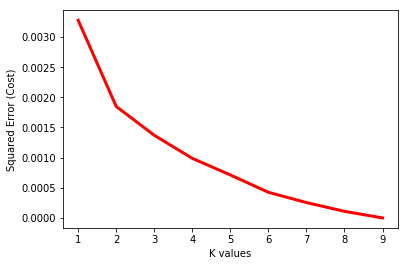

In [58]:
plt.plot(range(1,10),error_cost,color='r',linewidth='3')
plt.xlabel('K values')
plt.ylabel('Squared Error (Cost)')
plt.grid(color='white')
plt.show()

In [59]:
# set number of clusters
kclusters = 4

milan_grouped_clustering = milan_grouped.drop('Name', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(milan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 0, 2, 3, 0, 1], dtype=int32)

In [60]:
milan_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [61]:
milan_merged = df
milan_merged.head(3)

# merge milan_grouped with milan_data to add latitude/longitude for each neighborhood
milan_merged = milan_merged.join(milan_venues_sorted.set_index('Name'), on='Name')
milan_merged = milan_merged.dropna()
#milan_merged['Cluster Labels'] = milan_merged['Cluster Labels'].astype(int)
milan_merged.shape # check the last columns!

(9, 14)

In [62]:
milan_merged.head(4)

,Borough,Name,Area,Population,Density,District,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,1,Centro storico,9.67,96315,11074,Brera,45.5024,9.200175,0,Pizza Place,Café,Italian Restaurant,Restaurant,Cocktail Bar
1,2,Stazione Centrale,12.58,153109,13031,Adriano,45.5077,9.218700,0,Pizza Place,Italian Restaurant,Café,Theater,Plaza
2,3,Città Studi,14.23,141229,10785,Casoretto,45.4823,9.215250,0,Italian Restaurant,Ice Cream Shop,Chinese Restaurant,Pizza Place,Hotel
3,4,Porta Vittoria,20.95,156369,8069,Acquabella,45.4313,9.217200,3,Pizza Place,Bakery,Plaza,Park,Supermarket


In [63]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
milan_merged["Cluster Labels"].unique()

array([0, 3, 1, 2])

In [64]:
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(milan_merged['Latitude'], milan_merged['Longitude'], milan_merged['Name'], milan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [65]:
milan_merged.loc[milan_merged['Cluster Labels'] == 0, milan_merged.columns[[1] + list(range(5, milan_merged.shape[1]))]]

,Name,District,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Centro storico,Brera,45.5024,9.200175,0,Pizza Place,Café,Italian Restaurant,Restaurant,Cocktail Bar
1,Stazione Centrale,Adriano,45.5077,9.218700,0,Pizza Place,Italian Restaurant,Café,Theater,Plaza
2,Città Studi,Casoretto,45.4823,9.215250,0,Italian Restaurant,Ice Cream Shop,Chinese Restaurant,Pizza Place,Hotel
5,Barona,Arzaga,45.4371,9.171950,0,Italian Restaurant,Supermarket,Japanese Restaurant,Gym,Tram Station
6,Baggio,Assiano,45.5049,9.158000,0,Café,Italian Restaurant,Plaza,Piadineria,Pizza Place
7,Fiera,Boldinasco,45.5168,9.163000,0,Italian Restaurant,Soccer Field,Park,Café,Pizza Place


In [66]:
milan_merged.loc[milan_merged['Cluster Labels'] == 1, milan_merged.columns[[1] + list(range(5, milan_merged.shape[1]))]]

,Name,District,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
4,Vigentino,Basmetto,45.4122,9.1805,1,Soccer Field,Tram Station,Park,Supermarket,Italian Restaurant


In [67]:
milan_merged.loc[milan_merged['Cluster Labels'] == 2, milan_merged.columns[[1] + list(range(5, milan_merged.shape[1]))]]

,Name,District,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
8,Porta Garibaldi,Affori,45.4643,9.1895,2,Boutique,Hotel,Plaza,Ice Cream Shop,Italian Restaurant


In [68]:
milan_merged.loc[milan_merged['Cluster Labels'] == 3, milan_merged.columns[[1] + list(range(5, milan_merged.shape[1]))]]

,Name,District,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
3,Porta Vittoria,Acquabella,45.4313,9.2172,3,Pizza Place,Bakery,Plaza,Park,Supermarket
